In [429]:
import os
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import feature_selection, linear_model , discriminant_analysis , preprocessing , neighbors , cross_validation

pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

%matplotlib inline
plt.style.use('ggplot')


Data Set Description:

Format
A data frame with 1250 observations on the following 9 variables.
-Year The year that the observation was recorded
-Lag1 Percentage return for previous day
-Lag2 Percentage return for 2 days previous
-Lag3 Percentage return for 3 days previous
-Lag4 Percentage return for 4 days previous
-Lag5 Percentage return for 5 days previous
-Volume Volume of shares traded (number of daily shares traded in billions)
-Today Percentage return for today
-Direction A factor with levels Down and Up indicating whether the market had a positive or negative
return on a given day

In [36]:
df = pd.read_csv("Smarket.csv")

In [37]:
df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [38]:
len(df)

1250

In [39]:
df.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [40]:
df.columns[0]

'Year'

 Plotting Scatter plots

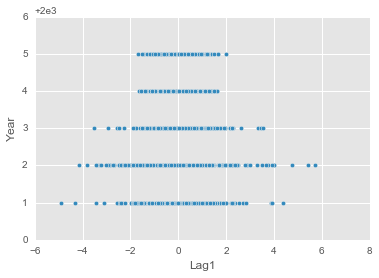

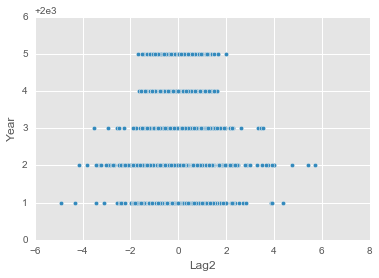

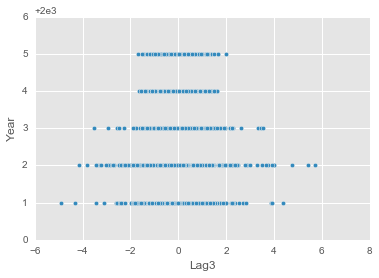

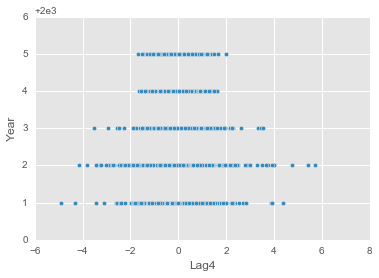

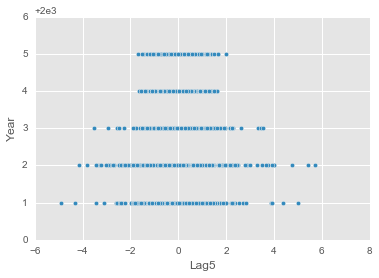

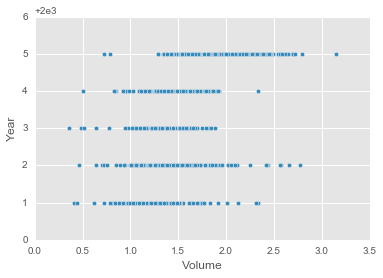

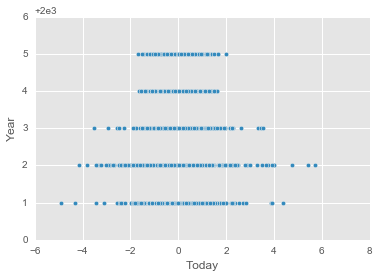

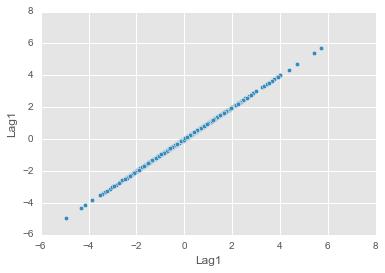

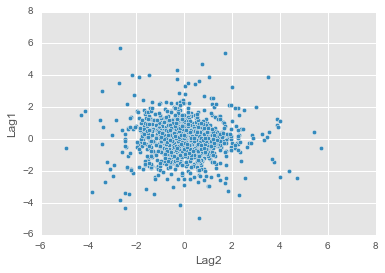

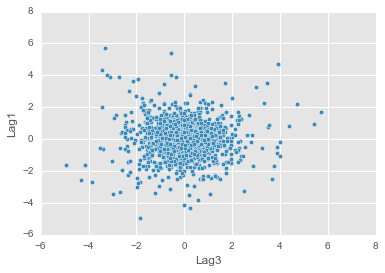

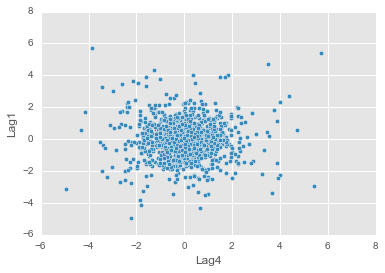

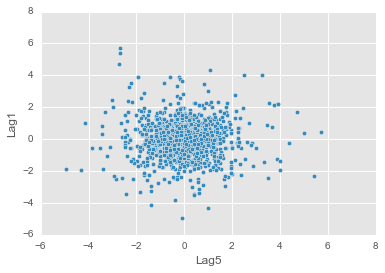

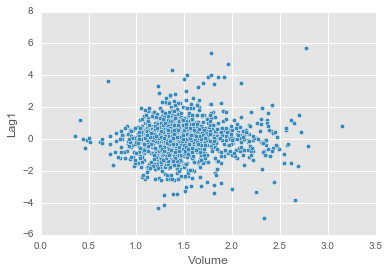

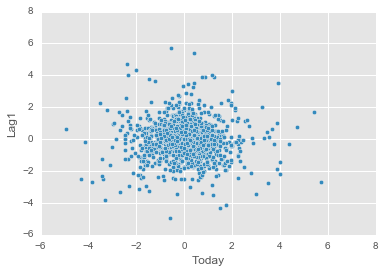

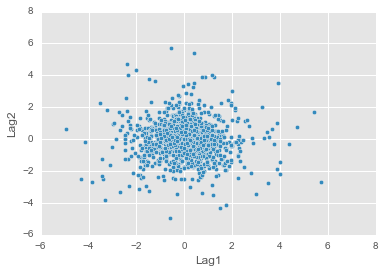

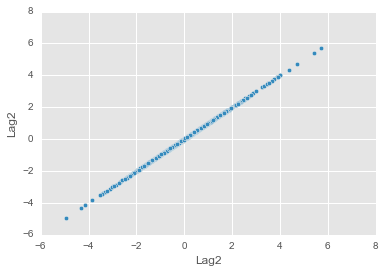

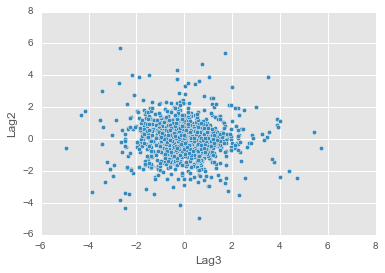

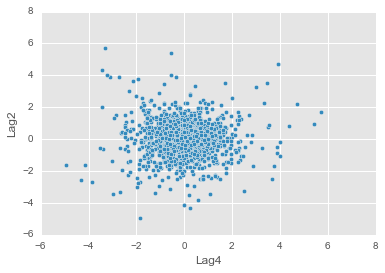

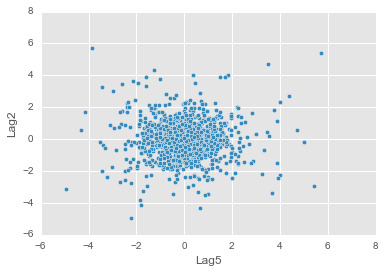

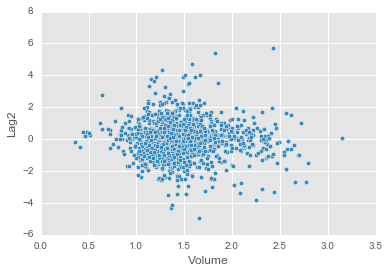

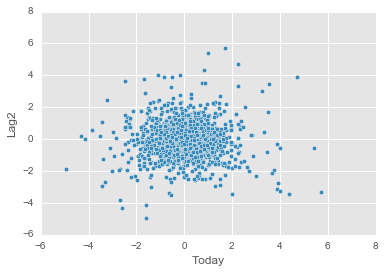

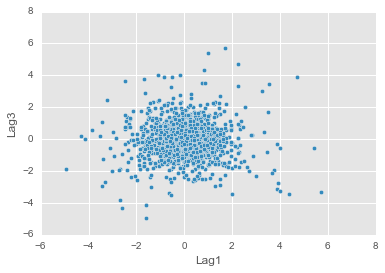

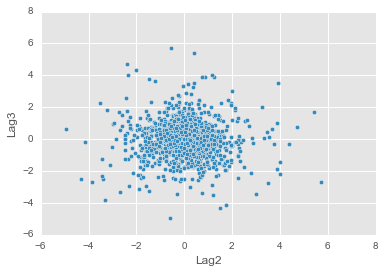

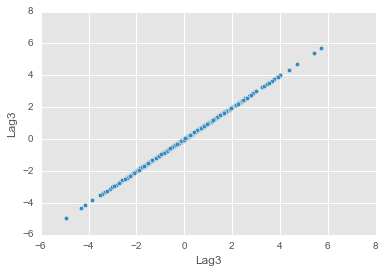

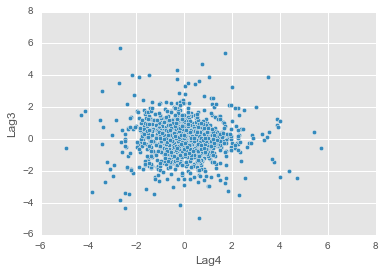

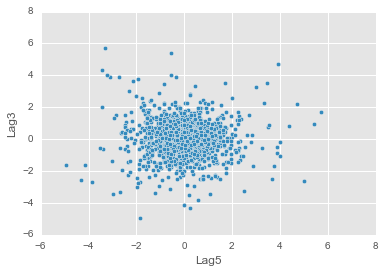

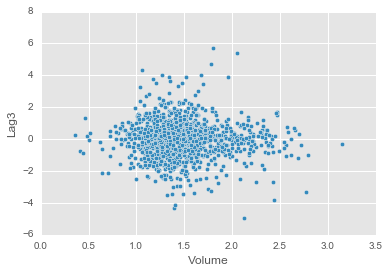

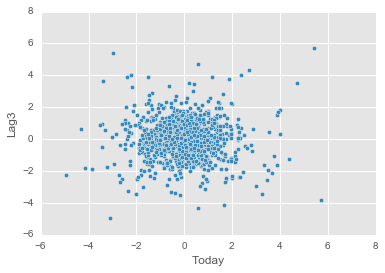

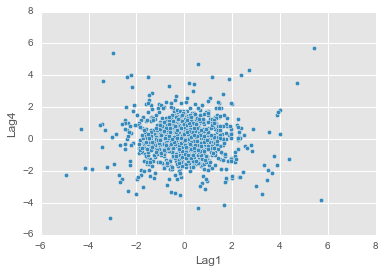

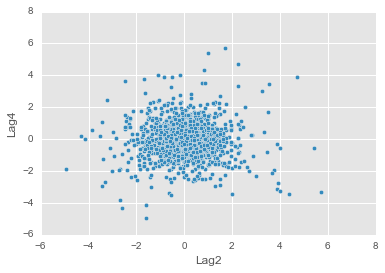

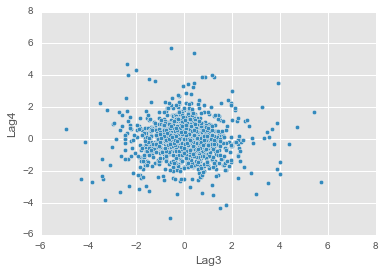

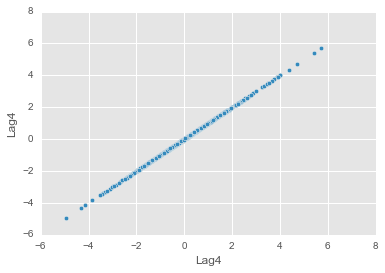

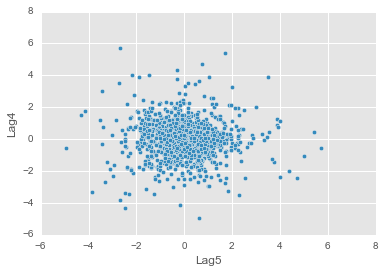

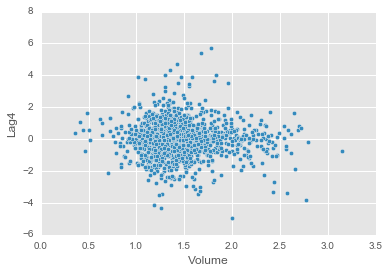

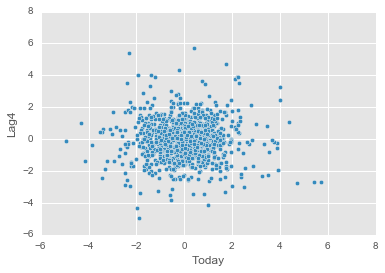

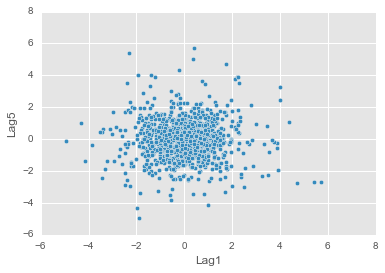

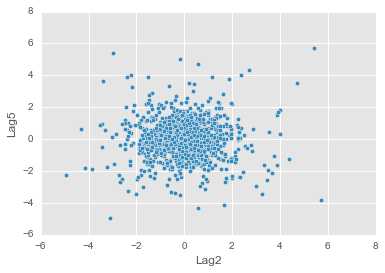

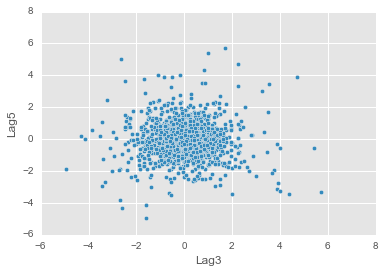

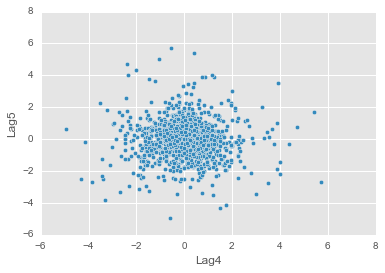

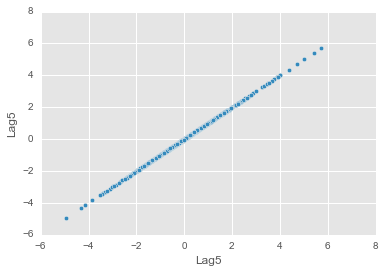

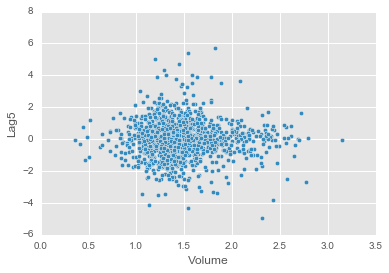

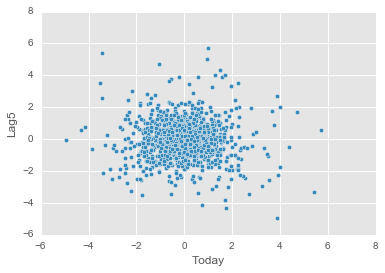

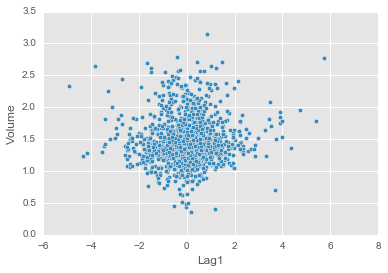

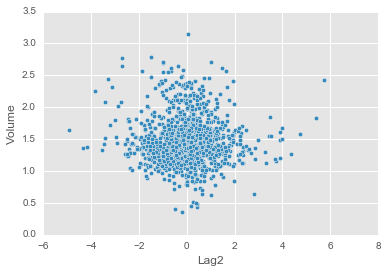

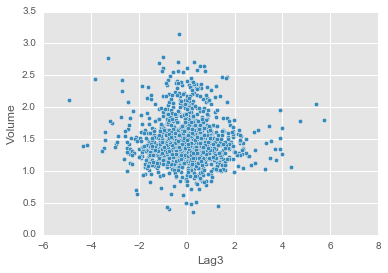

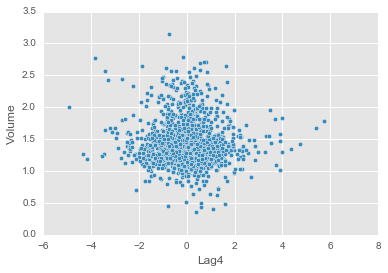

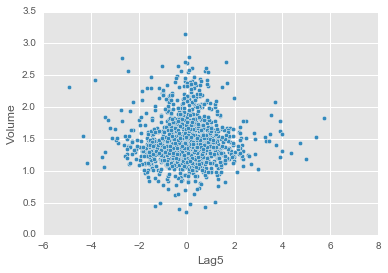

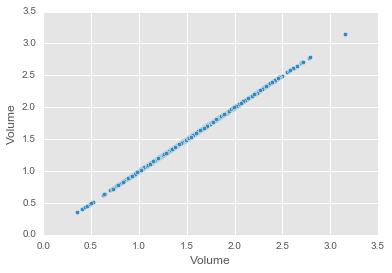

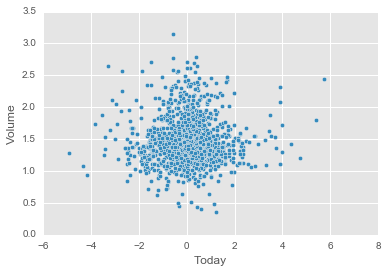

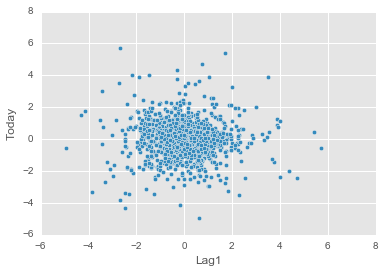

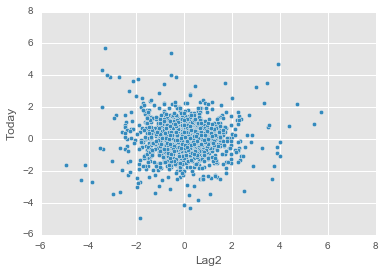

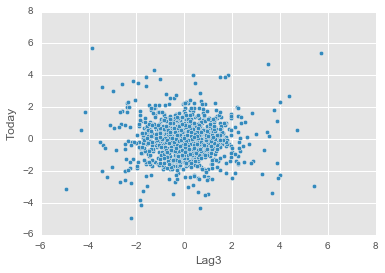

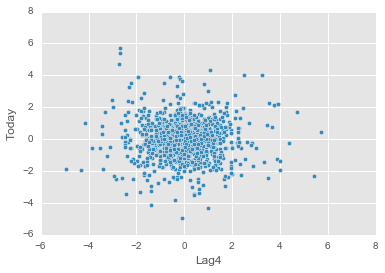

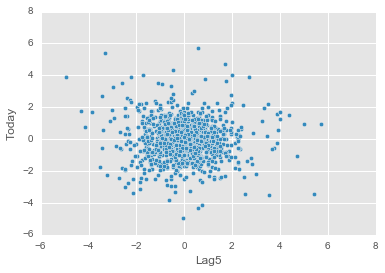

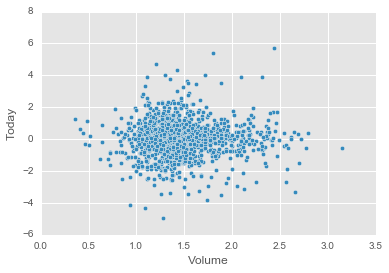

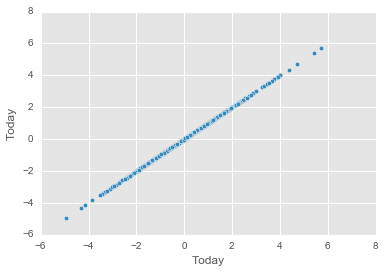

In [41]:
for i in range(0,len(df.columns)-1):
    for j in range(1,len(df.columns)-1):
        #print i , j
        df.plot(kind = 'scatter' , x = df.columns[j] , y = df.columns[i])
    

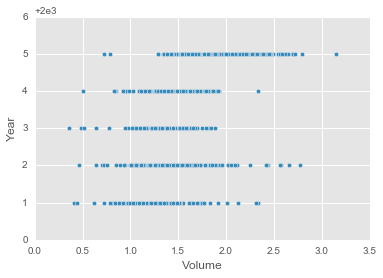

In [42]:
df[['Year','Volume']].plot(kind='scatter' , y= 'Year',x='Volume')

In [43]:
df.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


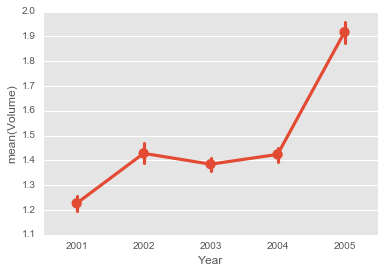

In [44]:
sns.pointplot(x = 'Year' , y = 'Volume' , data =  df)

Shows a clear trend of increasing volume over time

## Logistic Regresssion

In [45]:
df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [47]:
X = df[['Lag1' , 'Lag2' ,'Lag3' , 'Lag4' , 'Lag5' , 'Volume']]

y = df.Direction

In [48]:
df.columns

Index([u'Year', u'Lag1', u'Lag2', u'Lag3', u'Lag4', u'Lag5', u'Volume',
       u'Today', u'Direction'],
      dtype='object')

In [58]:
df['response'] = 0

In [73]:
df.loc[(df.Direction == 'Up') , 'response' ] =1

In [74]:
df.response.value_counts()

1    648
0    602
Name: response, dtype: int64

In [75]:
y = df.response

In [77]:
sm_model = sm.Logit(y ,X).fit()

Optimization terminated successfully.
         Current function value: 0.691143
         Iterations 4


In [78]:
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               response   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1244
Method:                           MLE   Df Model:                            5
Date:                Sat, 23 Jul 2016   Pseudo R-squ.:                0.001916
Time:                        04:38:48   Log-Likelihood:                -863.93
converged:                       True   LL-Null:                       -865.59
                                        LLR p-value:                    0.6513
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Lag1          -0.0721      0.050     -1.438      0.150        -0.170     0.026
Lag2          -0.0434      0.050     -0.868      0.386        -0.141     0.055
Lag3           0.0100      0.050      0.200      0.842        -0.088     0.108
Lag4           0.0081      0.050      0.162      0.872        -0.090     0.106
Lag5           0.0097      0.049      0.196      0.845        -0.087     0.107
Volume         0.0549      0.037      1.473      0.141        -0.018     0.128
==============================================================================
"""

In [82]:
model = linear_model.LogisticRegression()
model.fit(X ,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [84]:
model.coef_

array([[-0.07279035, -0.04229102,  0.010958  ,  0.00921799,  0.01023031,
         0.12793931]])

In [87]:
y_hat  = model.predict(X)

In [90]:
(y == y_hat).mean()

0.52480000000000004

In [89]:
len(df)

1250

# Test , Train split

In [142]:
df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,response
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,1
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,1
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,0
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,1
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,1


In [141]:
#df.drop('Direction' , axis = 1 ,inplace = True)

In [143]:
df_train = df[(df.Year < 2005)]

In [144]:
train_X = df_train[['Lag1' , 'Lag2' ,'Lag3' , 'Lag4' , 'Lag5' , 'Volume']]

In [145]:
train_y = df_train.response

In [146]:
model_split = linear_model.LogisticRegression()
model_split.fit(train_X , train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [147]:
model_split.coef_

array([[-0.05423894, -0.04542453,  0.00745773,  0.00675954, -0.00405469,
        -0.09769463]])

In [148]:
model_split.score(train_X , train_y)

0.52805611222444893

In [149]:
test_y = df.loc[(df.Year==2005) , 'response' ]
test_X = df[(df.Year==2005)]

In [150]:
test_X.drop('response' ,axis =1 , inplace = True)

/Users/dkhandelwal/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [121]:
test_X.drop('Direction' , axis =1 , inplace = True)

/Users/dkhandelwal/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [123]:
test_X.drop('Today' , axis =1 , inplace = True)

/Users/dkhandelwal/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [126]:
test_X.drop('Year' , axis =1 , inplace = True)

/Users/dkhandelwal/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [127]:
y_hat = model_split.predict(test_X)

In [129]:
(test_y==y_hat).mean()

0.48809523809523808

# LDA

In [132]:
df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,response
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up,1
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up,1
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down,0
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up,1
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up,1


In [133]:
df_trunc = df

In [134]:
df_trunc.drop('Direction' , axis = 1 , inplace = True)

In [135]:
df_trunc.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,response
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,1
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,1
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,0
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,1
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,1


## Checking the Covar for both the classes 

In [137]:
X_class_1 = df_trunc.loc[(df.response==1)]
X_class_0 = df_trunc.loc[(df.response==0)]

In [138]:
X_class_1.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,response
Year,1.000000,0.021252,0.032112,0.034938,0.030287,0.041316,0.558304,-0.323284,NaN
Lag1,0.021252,1.000000,-0.028928,0.050976,-0.026031,-0.062088,0.050884,-0.097546,NaN
Lag2,0.032112,-0.028928,1.000000,-0.002409,-0.018697,-0.014660,-0.027465,-0.103329,NaN
Lag3,0.034938,0.050976,-0.002409,1.000000,-0.063702,0.014342,-0.025588,-0.025943,NaN
Lag4,0.030287,-0.026031,-0.018697,-0.063702,1.000000,0.003020,-0.037408,-0.050182,NaN
Lag5,0.041316,-0.062088,-0.014660,0.014342,0.003020,1.000000,-0.034597,-0.124924,NaN
Volume,0.558304,0.050884,-0.027465,-0.025588,-0.037408,-0.034597,1.000000,-0.045454,NaN
Today,-0.323284,-0.097546,-0.103329,-0.025943,-0.050182,-0.124924,-0.045454,1.000000,NaN
response,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
X_class_0.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,response
Year,1.000000,0.045054,0.032897,0.030602,0.040741,0.016289,0.518082,0.290039,NaN
Lag1,0.045054,1.000000,-0.025591,-0.075207,0.020467,0.057168,0.032214,0.118936,NaN
Lag2,0.032897,-0.025591,1.000000,-0.049636,-0.002998,0.008664,-0.058912,0.135957,NaN
Lag3,0.030602,-0.075207,-0.049636,1.000000,0.015395,-0.055307,-0.059403,0.007521,NaN
Lag4,0.040741,0.020467,-0.002998,0.015395,1.000000,-0.058790,-0.059866,0.023363,NaN
Lag5,0.016289,0.057168,0.008664,-0.055307,-0.058790,1.000000,-0.008184,0.023368,NaN
Volume,0.518082,0.032214,-0.058912,-0.059403,-0.059866,-0.008184,1.000000,0.045023,NaN
Today,0.290039,0.118936,0.135957,0.007521,0.023363,0.023368,0.045023,1.000000,NaN
response,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


0      1
1      1
2      0
3      1
4      1
      ..
993    0
994    1
995    0
996    1
997    0
Name: response, dtype: int64

In [172]:
train_X_lda = df_train[['Lag1' , 'Lag2' ]]

In [183]:
test_X_lda = test_X[['Lag1' , 'Lag2']]
test_y_lda = test_y

In [194]:
# Instantiating a LDA with parameter SVD- Does not compute Cov 
model_lda = discriminant_analysis.LinearDiscriminantAnalysis()
model_lda.fit(train_X_lda , train_y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [178]:
print model_lda.coef_ 


[[-0.05544078 -0.0443452 ]]


In [175]:
print model_lda.priors_

[ 0.49198397  0.50801603]


In [176]:
print model_lda.means_

[[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]


In [177]:
print model_lda.classes_

[0 1]


In [186]:
y_hat_lda = model_lda.predict(test_X_lda )

#  QDA

In [196]:
model_qda = discriminant_analysis.QuadraticDiscriminantAnalysis()

In [204]:
model_qda.fit(train_X_lda , train_y)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariances=False, tol=0.0001)

In [205]:
model_qda.score(train_X_lda , train_y)

0.51402805611222446

In [206]:
y_hat_qda = model_qda.predict(test_X_lda )

In [207]:
(y_hat_qda ==test_y_lda).mean()

0.59920634920634919

# Caravan Dataset

In [254]:
# Loading the Data
df_Caravan = pd.read_csv("CARAVAN.csv")

In [255]:
df_Caravan.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,...,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,33,1,3,2,8,...,0,0,0,0,0
1,37,1,2,2,8,...,0,0,0,0,0
2,37,1,2,2,8,...,0,0,0,0,0
3,9,1,3,3,3,...,0,0,0,0,0
4,40,1,4,2,10,...,0,0,0,0,0


In [256]:
#Checking the dim
print "No of columns %r  " %len(df_Caravan.columns)
print "No of rows  %r "    %len(df_Caravan)

No of columns 86  
No of rows  5822 


In [257]:
df_Caravan.CARAVAN.value_counts()

0    5474
1     348
Name: CARAVAN, dtype: int64

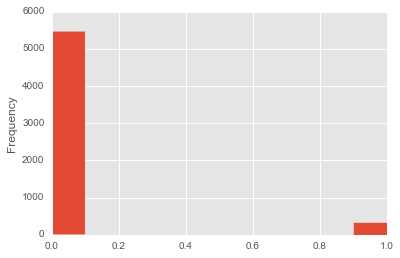

In [258]:
df_Caravan.CARAVAN.plot(kind = 'hist')

In [259]:
print (34800/5478)

6


In [260]:
#Preprocessing steps:
X = df_Caravan

In [261]:
len(X.columns)

86

In [266]:
X.drop('CARAVAN' ,axis = 1 ,inplace = True)

In [267]:
len(X.columns)

85

In [268]:
len(df_Caravan.columns)

85

In [223]:
X.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,...,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,...,0.000515,0.006012,0.031776,0.007901,0.014256
std,12.846706,0.405842,0.789835,0.814589,2.856760,...,0.022696,0.081632,0.210986,0.090463,0.119996
min,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.000000,5.000000,6.000000,10.000000,...,1.000000,2.000000,3.000000,2.000000,2.000000


In [229]:
X_scaled = preprocessing.scale(X , copy = False)

In [230]:
type(X_scaled)

numpy.ndarray

#### Scaling down the variables for KNN so that the weights are uniform

In [236]:
X_scaled = X.apply(preprocessing.scale)

/Users/dkhandelwal/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/dkhandelwal/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/dkhandelwal/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/dkhandelwal/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/dkhandelwal/anaconda/lib/python2.7/site-packages/sklearn/utils/va

In [237]:
X_scaled.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,...,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
count,5.822000e+03,5.822000e+03,5.822000e+03,5.822000e+03,5.822000e+03,...,5.822000e+03,5.822000e+03,5.822000e+03,5.822000e+03,5.822000e+03
mean,-1.015639e-16,-5.891695e-16,5.059123e-17,2.968433e-16,3.783378e-17,...,-1.518214e-16,-9.635599e-16,-3.440795e-16,6.019413e-16,-1.696465e-16
std,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,...,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00
min,-1.810219e+00,-2.725800e-01,-2.125697e+00,-2.444683e+00,-1.671134e+00,...,-2.270578e-02,-7.365027e-02,-1.506205e-01,-8.734772e-02,-1.188165e-01
25%,-1.109590e+00,-2.725800e-01,-8.595001e-01,-1.216964e+00,-9.709796e-01,...,-2.270578e-02,-7.365027e-02,-1.506205e-01,-8.734772e-02,-1.188165e-01
50%,4.473633e-01,-2.725800e-01,4.066966e-01,1.075466e-02,4.293284e-01,...,-2.270578e-02,-7.365027e-02,-1.506205e-01,-8.734772e-02,-1.188165e-01
75%,8.366015e-01,-2.725800e-01,4.066966e-01,1.075466e-02,7.794054e-01,...,-2.270578e-02,-7.365027e-02,-1.506205e-01,-8.734772e-02,-1.188165e-01
max,1.303687e+00,2.190544e+01,2.939090e+00,3.693911e+00,1.479559e+00,...,4.404165e+01,2.442874e+01,1.406958e+01,2.202302e+01,1.654985e+01


AttributeError: 'DataFrame' object has no attribute 'CARAVAN'

In [240]:
df_Caravan.columns

Index([u'MOSTYPE', u'MAANTHUI', u'MGEMOMV', u'MGEMLEEF', u'MOSHOOFD',
       u'MGODRK', u'MGODPR', u'MGODOV', u'MGODGE', u'MRELGE', u'MRELSA',
       u'MRELOV', u'MFALLEEN', u'MFGEKIND', u'MFWEKIND', u'MOPLHOOG',
       u'MOPLMIDD', u'MOPLLAAG', u'MBERHOOG', u'MBERZELF', u'MBERBOER',
       u'MBERMIDD', u'MBERARBG', u'MBERARBO', u'MSKA', u'MSKB1', u'MSKB2',
       u'MSKC', u'MSKD', u'MHHUUR', u'MHKOOP', u'MAUT1', u'MAUT2', u'MAUT0',
       u'MZFONDS', u'MZPART', u'MINKM30', u'MINK3045', u'MINK4575',
       u'MINK7512', u'MINK123M', u'MINKGEM', u'MKOOPKLA', u'PWAPART',
       u'PWABEDR', u'PWALAND', u'PPERSAUT', u'PBESAUT', u'PMOTSCO', u'PVRAAUT',
       u'PAANHANG', u'PTRACTOR', u'PWERKT', u'PBROM', u'PLEVEN', u'PPERSONG',
       u'PGEZONG', u'PWAOREG', u'PBRAND', u'PZEILPL', u'PPLEZIER', u'PFIETS',
       u'PINBOED', u'PBYSTAND', u'AWAPART', u'AWABEDR', u'AWALAND',
       u'APERSAUT', u'ABESAUT', u'AMOTSCO', u'AVRAAUT', u'AAANHANG',
       u'ATRACTOR', u'AWERKT', u'ABROM', u'ALEVEN', 

In [ ]:
# Getting the Dataset back as X as removed the response column

In [269]:
df_Caravan = pd.read_csv("CARAVAN.csv")


In [270]:
len(df_Caravan.columns)

86

In [271]:
len(X.columns)

85

In [274]:
test_X = X_scaled.head(1000)
test_y = df_Caravan.CARAVAN.head(1000)

In [295]:
train_X = X_scaled.loc[ 1001:5821] 
train_y = df_Caravan.CARAVAN.loc[1001 :5821]

In [297]:
#neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'distance').fit(X, y).score(X, y)

4821

In [302]:
model_knn = neighbors.KNeighborsClassifier(n_neighbors = 1, weights = 'distance')
model_knn.fit(train_X, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='distance')

In [303]:
model_knn.score(train_X, train_y)

0.99211781788010789

In [304]:
model_knn.score(test_X, test_y)

0.88200000000000001

In [307]:
# k = range(1, len(train_X))

# score_df = pd.DataFrame({'k': k})

# models = score_df.\
#     apply(lambda row: neighbors.KNeighborsClassifier(n_neighbors = row['k']).fit(train_X, train_y), axis = 1)

# models

# score_df['Score'] = models.map(lambda model: model.score(train_X, train_y))

# Applied Exercise - Q10

In [309]:
df_Auto = pd.read_csv("Auto.csv")

In [312]:
df_Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [310]:
df_Auto.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


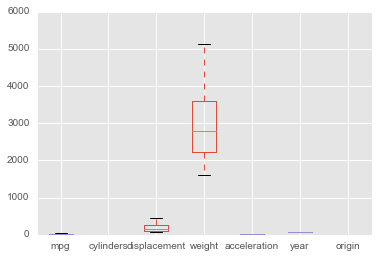

In [313]:
plt.figure(figsize=(20,10))
df_Auto.plot(kind = 'box')

In [326]:
df_Auto[[1]]

,cylinders
0,8
1,8
2,8
3,8
4,8
...,...
392,4
393,4
394,4
395,4


KeyError: 'horsepower'

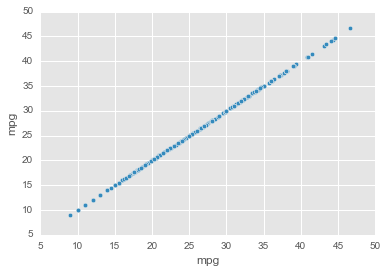

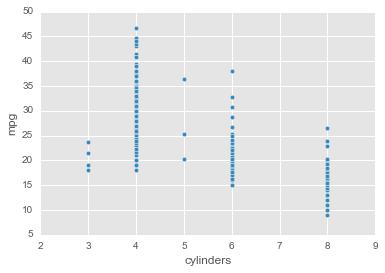

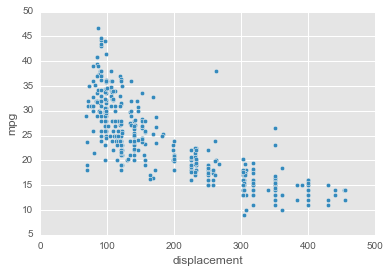

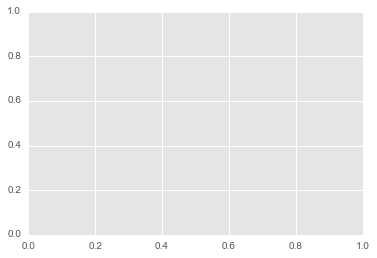

In [331]:
#Checking for Text/non numeric values in the columns 
for i in range(0,len(df_Auto.columns)):
    df_Auto.plot(kind = 'scatter' , x = df_Auto.columns[i] , y = 'mpg')

In [332]:
df_Auto.horsepower.value_counts()

150    22
90     20
88     19
110    18
100    17
       ..
107     1
133     1
91      1
94      1
132     1
Name: horsepower, dtype: int64

In [334]:
(df_Auto.horsepower == '?').sum()

5

In [341]:
#converting the HP column to numeric
df_Auto.horsepower = pd.to_numeric(df_Auto.horsepower , 'coerce')
#checking for NAN 
df_Auto.horsepower.isnull().sum()
#Dropping the NAN values
df_Auto.dropna(inplace = True)
len(df_Auto)


392

Plotting the data after the conversion

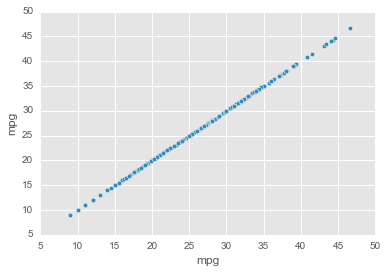

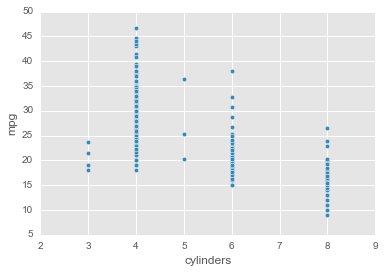

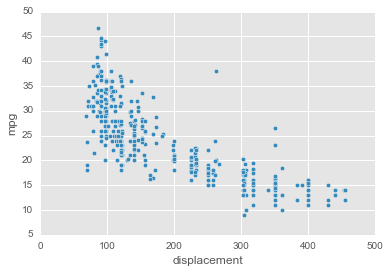

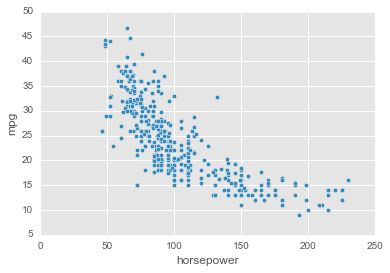

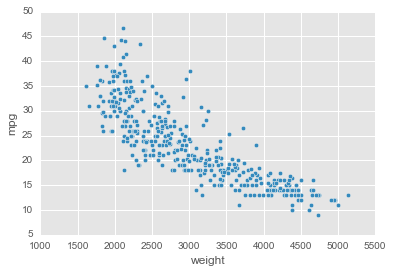

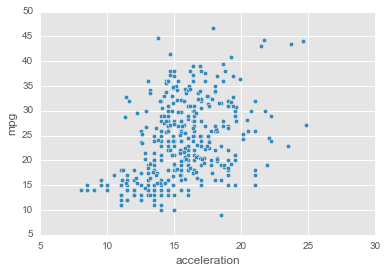

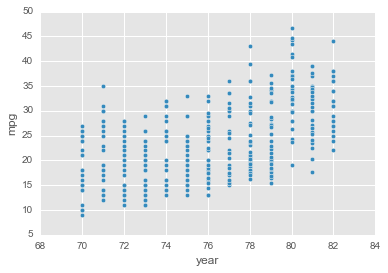

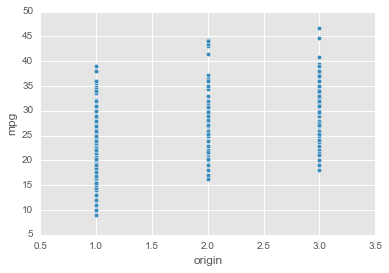

In [343]:
plt.figure(figsize = (20,10))
for i in range(0,len(df_Auto.columns)-1):
    df_Auto.plot(kind = 'scatter' , x = df_Auto.columns[i] , y = 'mpg')

Here is what we observe based on plots:
1)The plots for mpg against weight , HP and displacement is approx the same
2)There appears to be a high degree of co relation 

In [344]:
#checking co-relation Matrix:
df_Auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


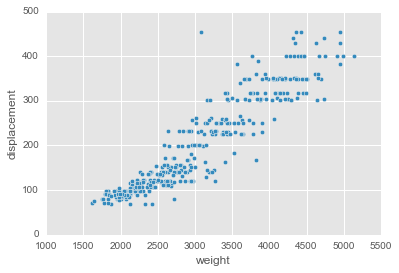

In [349]:
df_Auto[['weight' , 'displacement']].plot(kind = 'scatter' , x = 'weight' , y = 'displacement')

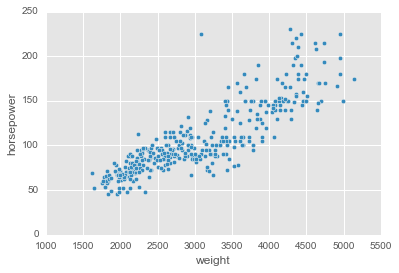

In [350]:
df_Auto[['weight' , 'horsepower']].plot(kind = 'scatter' , x = 'weight' , y = 'horsepower')

In [351]:
df_Auto[['weight' , 'displacement' , 'horsepower']].corr()

,weight,displacement,horsepower
weight,1.000000,0.932994,0.864538
displacement,0.932994,1.000000,0.897257
horsepower,0.864538,0.897257,1.000000


In [352]:
temp_df = df_Auto[['weight' , 'displacement' , 'horsepower']]

The relationship appears highly linear, so we can fit a linear model incorporating the relationship.

In [356]:
model_temp = smf.ols(formula = 'horsepower ~ weight + displacement' , data = temp_df).fit()
model_temp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             horsepower   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     833.9
Date:                Tue, 26 Jul 2016   Prob (F-statistic):          2.14e-141
Time:                        03:56:08   Log-Likelihood:                -1660.3
No. Observations:                 392   AIC:                             3327.
Df Residuals:                     389   BIC:                             3338.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       25.8749      4.547      5.691      0.000        16.936    34.814
weight           0.0096      0.003      3.453      0.001         0.004     0.015
displacement     0.2574      0.023     11.423      0.000         0.213     0.302
==============================================================================
Omnibus:                       22.276   Durbin-Watson:                   1.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.692
Skew:                           0.395   Prob(JB):                     1.78e-08
Kurtosis:                       4.249   Cond. No.                     1.66e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The relationship between HP , weight and displacement can be repesented using a linear formula
HP = 25.87 + .0096* weight + .2574* displacement


In [359]:
# Creating a new feature that will hold the relationship between hp, weight and didplacement 
df_Auto['hp_wt_disp'] = '0'

In [368]:
# This function will calculate and return the linear relationship
def transform_var(df):
    df.hp_wt_disp = 25.87 + .0096*df.weight + .2574*df.displacement
    

In [369]:
transform_var(df_Auto)

In [370]:
df_Auto.hp_wt_disp

0      138.5302
1      151.4128
2      140.7088
3      137.0764
4      136.7152
         ...   
392     88.6900
393     71.2858
394     82.6510
395     81.9580
396     82.6126
Name: hp_wt_disp, dtype: float64

In [371]:
# Checking the corelation to confirm the linear relationship
df_Auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,hp_wt_disp
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209,-0.821305
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932,0.949860
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535,0.996411
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,0.900482
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005,0.960111
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746,-0.520556
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528,-0.360071
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000,-0.615069
hp_wt_disp,-0.821305,0.949860,0.996411,0.900482,0.960111,-0.520556,-0.360071,-0.615069,1.000000


In [475]:
#a new data frame
df_transformed = df_Auto.drop(['displacement' , 'horsepower' , 'weight'], axis =1 )

In [476]:
df_transformed.head()

,mpg,cylinders,acceleration,year,origin,name,hp_wt_disp
0,18.0,8,12.0,70,1,chevrolet chevelle malibu,138.5302
1,15.0,8,11.5,70,1,buick skylark 320,151.4128
2,18.0,8,11.0,70,1,plymouth satellite,140.7088
3,16.0,8,12.0,70,1,amc rebel sst,137.0764
4,17.0,8,10.5,70,1,ford torino,136.7152


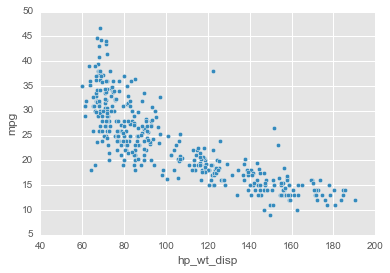

In [374]:
df_transformed[['mpg' , 'hp_wt_disp']].plot(kind = 'scatter' , x = 'hp_wt_disp' , y = 'mpg')

In [477]:
df_transformed['hp_wt_disp'] = df_transformed.hp_wt_disp.apply(np.sqrt)

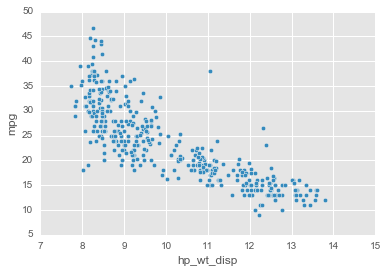

In [478]:
df_transformed[['mpg' , 'hp_wt_disp']].plot(kind = 'scatter' , x = 'hp_wt_disp' , y = 'mpg')

In [412]:
model_linear = smf.ols(formula  = 'mpg ~hp_wt_disp + cylinders + acceleration  + year' , data = df_transformed).fit()
model_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     394.9
Date:                Tue, 26 Jul 2016   Prob (F-statistic):          3.88e-135
Time:                        06:52:28   Log-Likelihood:                -1042.6
No. Observations:                 392   AIC:                             2095.
Df Residuals:                     387   BIC:                             2115.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       55.6812      6.931      8.033      0.000        42.054    69.309
hp_wt_disp     -28.8211      2.191    -13.154      0.000       -33.129   -24.513
cylinders        1.0056      0.330      3.043      0.002         0.356     1.655
acceleration    -0.1085      0.075     -1.450      0.148        -0.256     0.039
year             0.7264      0.051     14.108      0.000         0.625     0.828
==============================================================================
Omnibus:                       45.159   Durbin-Watson:                   1.236
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.633
Skew:                           0.608   Prob(JB):                     1.41e-22
Kurtosis:                       5.164   Cond. No.                     3.17e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Acceleration has a high P value can should be ignored

In [479]:
df_transformed['mpg01'] = df_transformed.mpg > df_transformed.mpg.median()

In [480]:
# converting a Boolean into 1 or 0
df_transformed['mpg01'] = 1* df_transformed['mpg01']

In [397]:
df_transformed.mpg01.value_counts()


1    196
0    196
Name: mpg01, dtype: int64

# plotting a scatter plot for mpg01 and other variables.
## Logistic Regression problem with response as mpg01



In [405]:
df_transformed.head()

,mpg,cylinders,acceleration,year,origin,name,hp_wt_disp,mpg01
0,18.0,8,12.0,70,1,chevrolet chevelle malibu,3.430727,0
1,15.0,8,11.5,70,1,buick skylark 320,3.507847,0
2,18.0,8,11.0,70,1,plymouth satellite,3.444136,0
3,16.0,8,12.0,70,1,amc rebel sst,3.421690,0
4,17.0,8,10.5,70,1,ford torino,3.419434,0


Graphicaly exploring the Data and its association

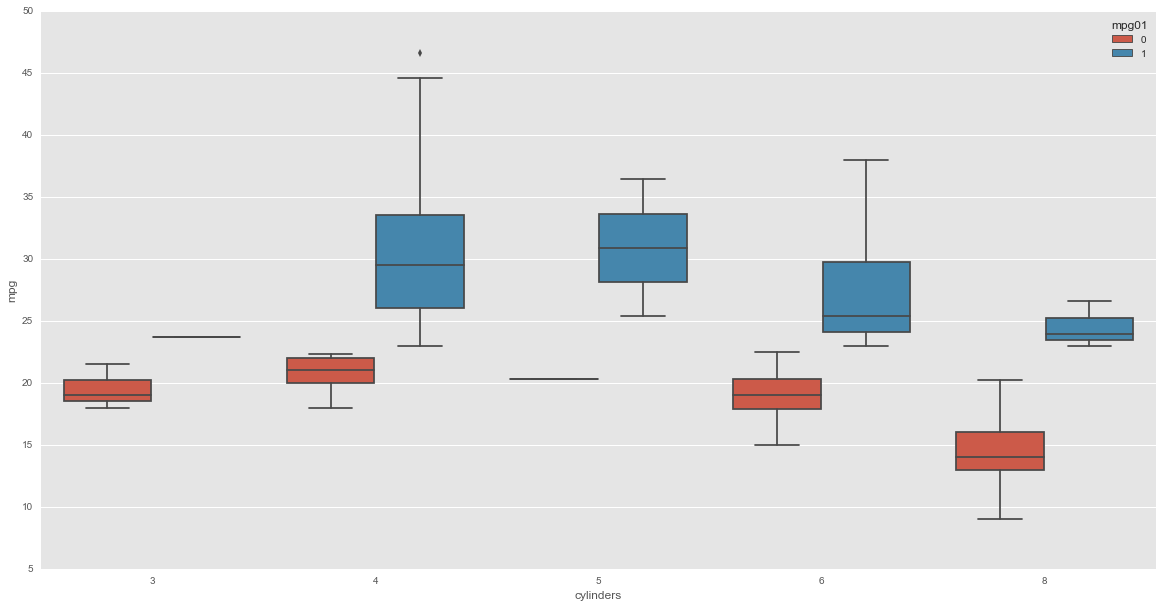

In [410]:
plt.figure(figsize=(20,10))
sns.boxplot(y="mpg", x="cylinders", hue="mpg01", data=df_transformed );

Few things to Note:
1) Cars with 4 cylinders have the maximum fuel efficiency
2)cars with 5 cylinders seem to have the most values that are in the mean

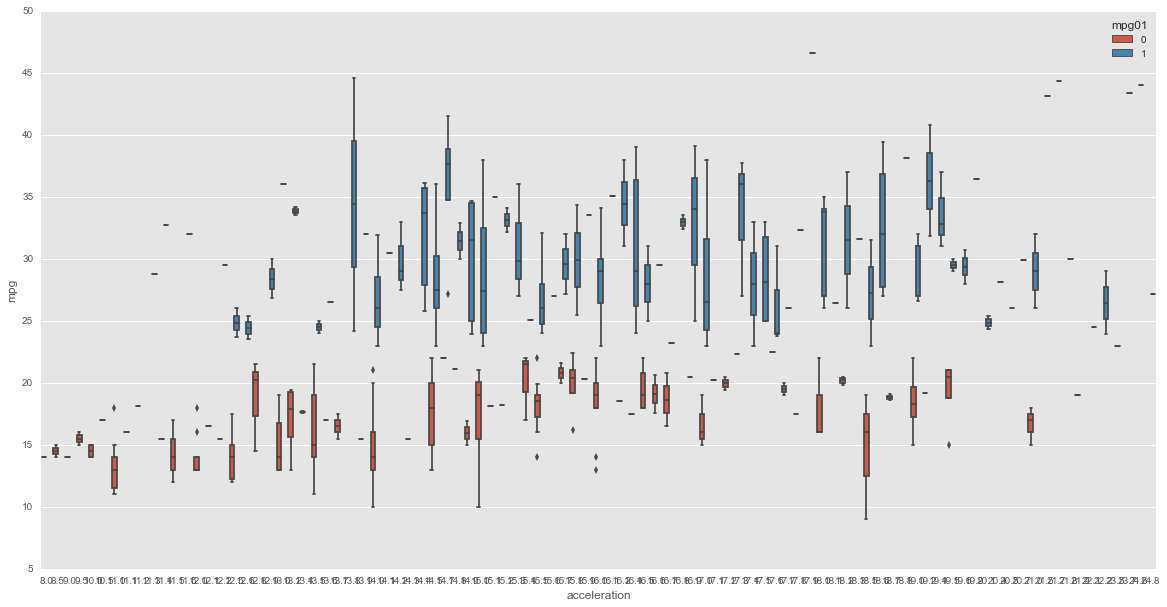

In [413]:
plt.figure(figsize=(20,10))
sns.boxplot(y="mpg", x="acceleration", hue="mpg01", data=df_transformed );

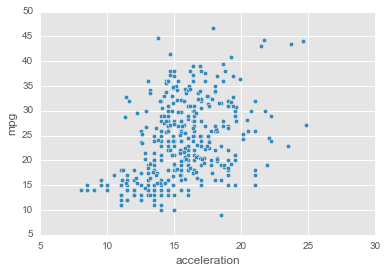

In [415]:
plt.figure(figsize=(20,10))
df_transformed.plot(y="mpg", x="acceleration",kind = 'scatter')

Appears that Acceleration is indeed scattered with no real pattern

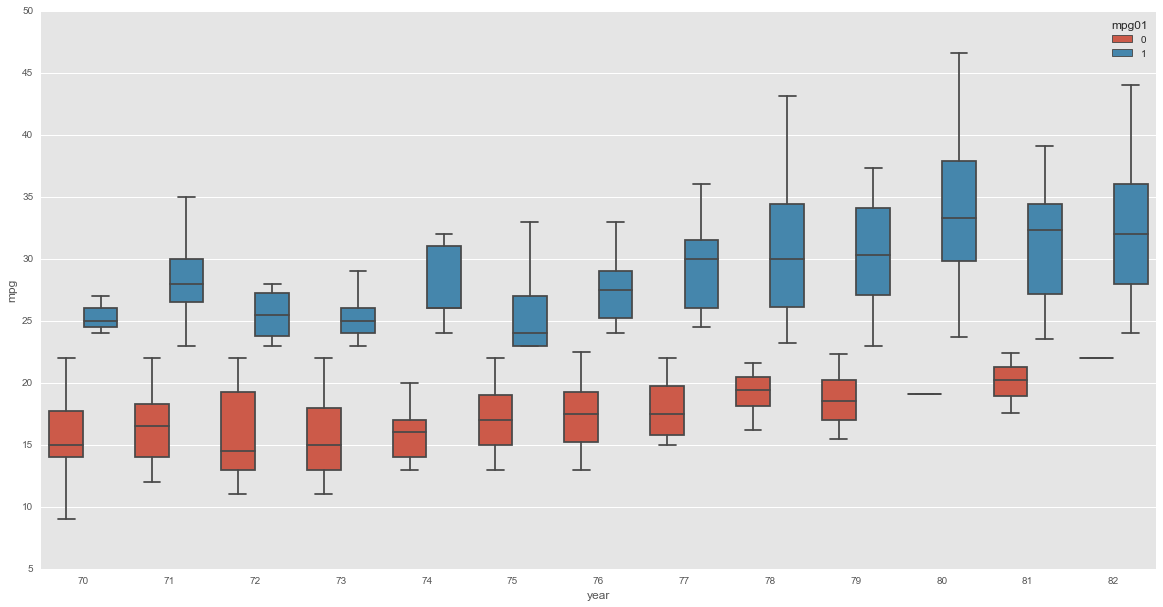

In [418]:
plt.figure(figsize=(20,10))
sns.boxplot(y="mpg", x="year", hue="mpg01", data=df_transformed );

Maximum fuel efficiency appears to have been in Cars of 1980 and there were no cars with mpg less than the median

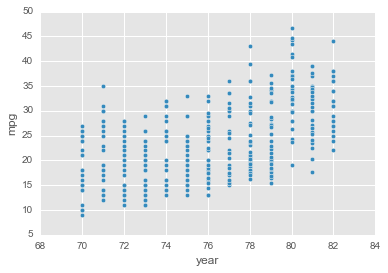

In [419]:
df_transformed.plot(y="mpg", x="year",kind = 'scatter')

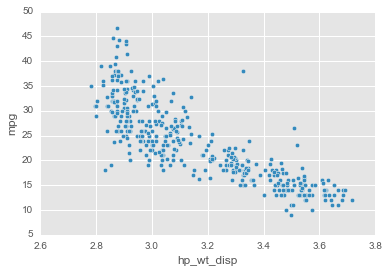

In [421]:
plt.figure(figsize=(20,10))
df_transformed.plot(y="mpg", x="hp_wt_disp" , kind = 'scatter' );

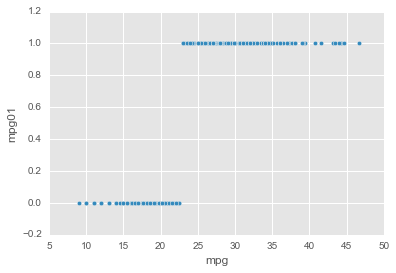

In [422]:
df_transformed.plot(kind = 'scatter' , x = 'mpg' , y = 'mpg01')

## Train Test split

In [481]:
X = df_transformed


In [482]:
X.columns

Index([u'mpg', u'cylinders', u'acceleration', u'year', u'origin', u'name',
       u'hp_wt_disp', u'mpg01'],
      dtype='object')

In [483]:
X.drop('mpg01' , axis =1)

,mpg,cylinders,acceleration,year,origin,name,hp_wt_disp
0,18.0,8,12.0,70,1,chevrolet chevelle malibu,11.769885
1,15.0,8,11.5,70,1,buick skylark 320,12.304991
2,18.0,8,11.0,70,1,plymouth satellite,11.862074
3,16.0,8,12.0,70,1,amc rebel sst,11.707963
4,17.0,8,10.5,70,1,ford torino,11.692528
...,...,...,...,...,...,...,...
392,27.0,4,15.6,82,1,ford mustang gl,9.417537
393,44.0,4,24.6,82,2,vw pickup,8.443092
394,32.0,4,11.6,82,1,dodge rampage,9.091260
395,28.0,4,18.6,82,1,ford ranger,9.053066


In [484]:
X.columns

Index([u'mpg', u'cylinders', u'acceleration', u'year', u'origin', u'name',
       u'hp_wt_disp', u'mpg01'],
      dtype='object')

In [485]:
y = df_transformed.mpg01

In [430]:
train_X, test_X, train_y, test_y = cross_validation.train_test_split(X, y, test_size = 0.2)

In [487]:
train_X.drop('mpg01' , axis =1 , inplace = True)

/Users/dkhandelwal/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [488]:
train_y

265    0
20     1
90     0
255    1
128    0
      ..
78     0
287    0
290    0
50     1
279    1
Name: mpg01, dtype: int64

In [489]:
test_X.drop('mpg01' , axis =1 , inplace = True)

/Users/dkhandelwal/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [490]:
print ' Length of Training set is % r' %len(train_X)
print ' Length of Test set is % r' %len(test_X)


 Length of Training set is 313
 Length of Test set is 79


In [491]:
train_X.dtypes=='object'

mpg             False
cylinders       False
acceleration    False
year            False
origin          False
hp_wt_disp      False
dtype: bool

In [440]:
len(train_X.name.unique())

249

In [441]:
train_X.drop('name' , axis = 1 , inplace = True)

/Users/dkhandelwal/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [492]:
train_X.columns

Index([u'mpg', u'cylinders', u'acceleration', u'year', u'origin',
       u'hp_wt_disp'],
      dtype='object')

In [494]:
train_y.value_counts()

0    160
1    153
Name: mpg01, dtype: int64

## ----> Modeling<-----

In [504]:
model_sm = sm.Logit(train_y , train_X).fit().summary()

         Current function value: 0.000000
         Iterations: 35


/Users/dkhandelwal/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [495]:
model_linear = linear_model.LogisticRegression()

In [496]:
model_linear.fit(train_X , train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [497]:
model_linear.coef_

array([[ 2.13860264,  0.03326123, -0.23275792, -0.54126108, -0.40136507,
        -0.82353559]])

In [498]:
model_linear.score(train_X , train_y)

0.98083067092651754

In [499]:
cross_validation.cross_val_score(model_linear, train_X, train_y, cv = 10).mean()

0.97137096774193554

In [500]:
y_hat = model_linear.predict(test_X)

In [501]:
(y_hat == test_y).mean()

0.96202531645569622

Findings:
1) Training set has almost 100% accuracy
2)10 folds CV yields an accuracy of 99.68
3)

## LDA



In [505]:
model_lda = discriminant_analysis.LinearDiscriminantAnalysis()
model_lda.fit(train_X , train_y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [506]:
train_X.columns

Index([u'mpg', u'cylinders', u'acceleration', u'year', u'origin',
       u'hp_wt_disp'],
      dtype='object')

In [507]:
model_lda.score(train_X ,train_y)

0.94888178913738019

In [510]:
y_hat = model_lda.predict(test_X)

In [512]:
(y_hat == test_y).mean()

0.96202531645569622

## QDA

In [513]:
model_qda = discriminant_analysis.QuadraticDiscriminantAnalysis()
model_qda.fit(train_X , train_y)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariances=False, tol=0.0001)

In [514]:
model_qda.score(train_X ,train_y)

0.93290734824281152

In [516]:
y_hat_qda = model_qda.predict(test_X)

In [517]:
(y_hat_qda == test_y).mean()

0.97468354430379744

KNN

In [518]:
model = neighbors.KNeighborsClassifier(n_neighbors = 1, weights = 'uniform')
model.fit(train_X, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [524]:
k = range(1, 200)

score_df = pd.DataFrame({'k': k})

models = score_df.\
    apply(lambda row: neighbors.KNeighborsClassifier(n_neighbors = row['k']).fit(train_X, train_y), axis = 1)

models

score_df['Score'] = models.map(lambda model: model.score(train_X, train_y))

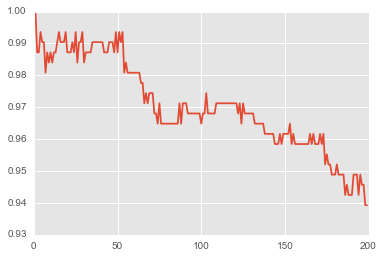

In [525]:
plt.plot(score_df.k, score_df.Score)

In [523]:
score_df

,k,Score
0,1,1.000000
1,2,0.987220
2,3,0.987220
3,4,0.993610
4,5,0.990415
...,...,...
14,15,0.993610
15,16,0.990415
16,17,0.990415
17,18,0.990415
